# <b>heatmap</b>

This section provides examples of how to use the <b>heatmap</b> function.  At a minimum, the `heatmap` function requires the following keywords:
<ul>
<li>`df`: a pandas DataFrame</li>
<li>`x`: the name of the DataFrame column containing the x-axis data</li>
<li>`y`: the name of the DataFrame column containing the y-axis data</li>
<li>`z`: the name of the DataFrame column containing the z-axis data</li>
</ul>

Heatmaps in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> can display both categorical and non-categorical data on either a uniform or non-uniform grid.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_heatmap.csv'))
df.head()

,Player,Category,Average
0,Lebron James,Points,27.5
1,Lebron James,Assists,9.1
2,Lebron James,Rebounds,8.6
3,Lebron James,Blocks,0.9
4,James Harden,Points,30.4


### Set theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Categorical heatmap

First consider a case where both the `x` and `y` DataFrame columns contain categorical data values:

### No data labels

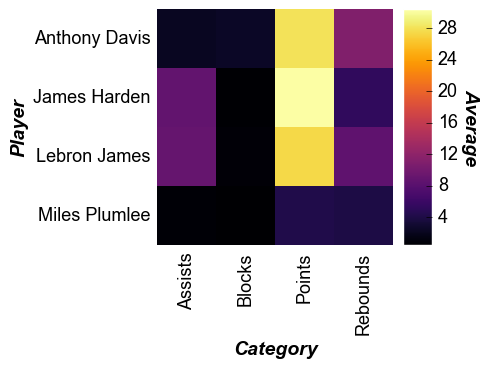

In [5]:
fcp.heatmap(df=df, x='Category', y='Player', z='Average', cbar=True, show=SHOW)

Note that for heatmaps the `x` tick labels are rotated 90&#176; by default.  This can be overridden via the keyword `tick_labels_major_x_rotation`.

### With data labels

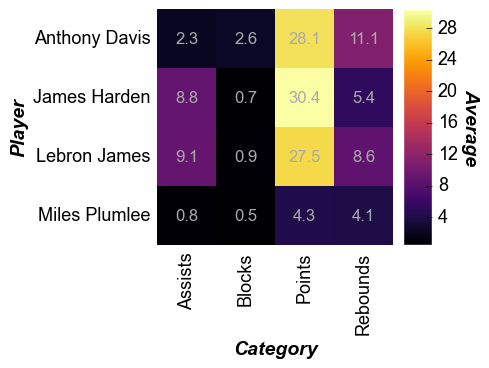

In [6]:
fcp.heatmap(df=df, x='Category', y='Player', z='Average', cbar=True, data_labels=True, 
            heatmap_font_color='#aaaaaa', show=SHOW, tick_labels_major_y_edge_width=0, ws_ticks_ax=5)

### Cell size

The size of the heatmap cell will default to a width of 60 pixels <i>unless</i>: (1) the keyword `heatmap_cell_size` (or `cell_size` when directly supplying the value to the function call) is specified; or (2) `ax_size` is explicitly defined.  Note that for a heatmap the cells are always square with width=height.

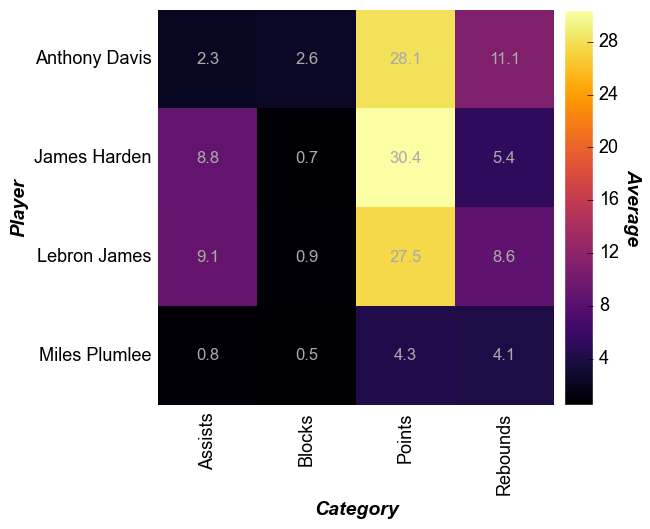

In [7]:
fcp.heatmap(df=df, x='Category', y='Player', z='Average', cbar=True, data_labels=True, 
            heatmap_font_color='#aaaaaa', show=SHOW, tick_labels_major_y_edge_width=0, ws_ticks_ax=5, cell_size=100)

## Non-uniform data

A major difference between heatmaps and contour plots is that contour plots assume that the `x` and `y` DataFrame column values are numerical and continuous.  With a heatmap, we can cast numerical data into categorical form.  Note that any missing values get mapped as `nan` values are not not plotted.  

In [8]:
# Read the contour DataFrame
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_contour.csv'))

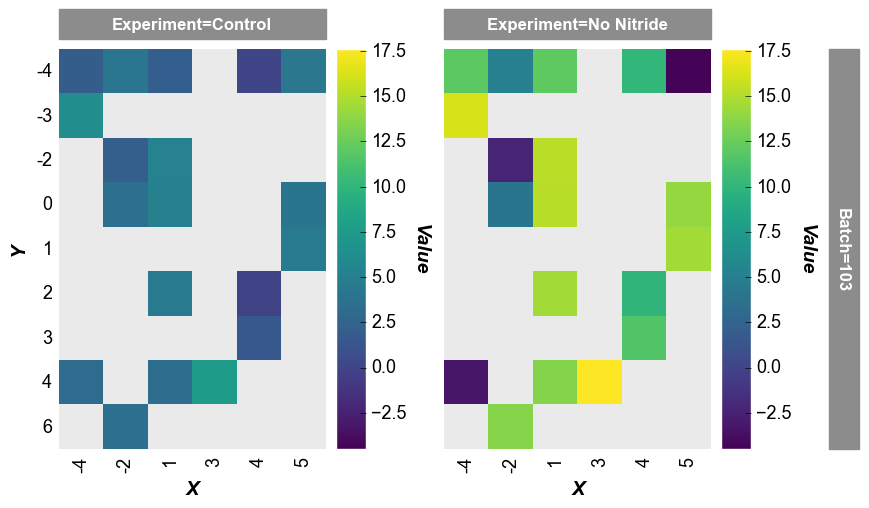

In [9]:
fcp.heatmap(df=df2, x='X', y='Y', z='Value', row='Batch', col='Experiment', 
            cbar=True, show=SHOW, share_z=True, ax_size=[400, 400],
            data_labels=False, label_rc_font_size=12, filter='Batch==103', cmap='viridis')

Note that the x-axis width is not 400px as specified by the keyword `ax_scale`.  This occurs because the data set does not have as many values on the x-axis as on the y-axis.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> applies the axis size to the axis with the most items and scales the other axis accordingly.

## imshow alternative

We can also use `fcp.heatmap` to display images (similar to `imshow` in matplotlib).  Here we will take a random image from the world wide web, place it in a pandas DataFrame, and display.

In [10]:
# Read an image
import imageio
url = 'https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg'
imgr = imageio.imread(url)

# Convert to grayscale
r, g, b = imgr[:,:,0], imgr[:,:,1], imgr[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

# Convert image data to pandas DataFrame
img = pd.DataFrame(gray)
img.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
1,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
2,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
3,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,219.9071,219.9071,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071
4,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.907,220.9070,220.9070,...,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071,219.9071


Display the image as a colored heatmap:

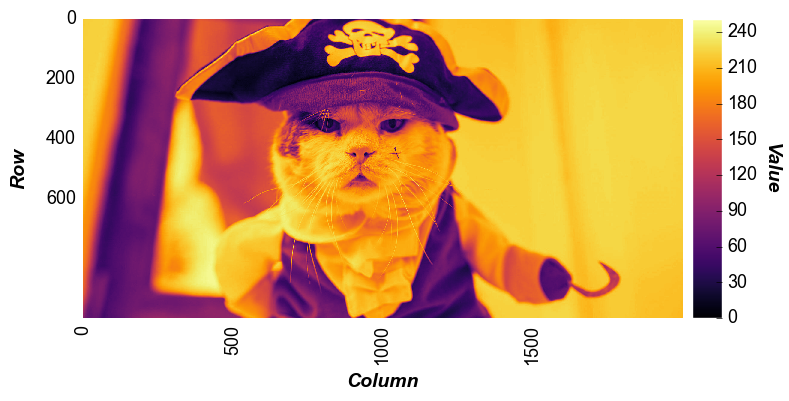

In [11]:
fcp.heatmap(img, cmap='inferno', cbar=True, ax_size=[600, 600])

Now let's enhance the contrast of the same image by limiting our color range to the mean pixel value +/- 3 * sigma:

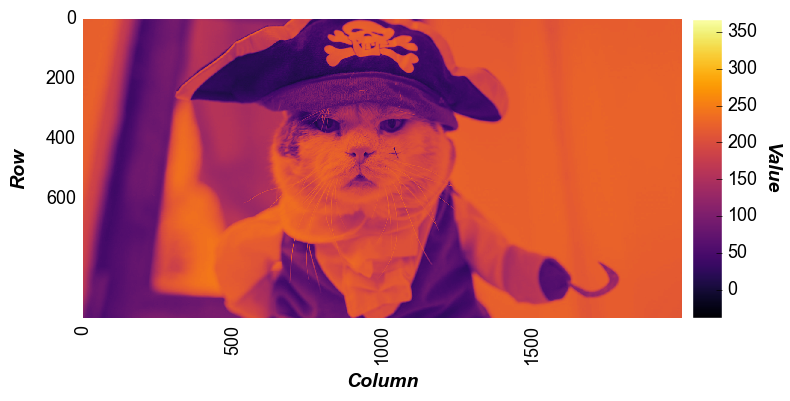

In [12]:
uu = img.stack().mean()
ss = img.stack().std()
fcp.heatmap(img, cmap='inferno', cbar=True, ax_size=[600, 600], zmin=uu-3*ss, zmax=uu+3*ss)

We can also crop the image by specifying range value for `x` and `y`.  Unlike `imshow`, the actual row and column values displayed on the x- and y-axis are preserved after the zoom (not reset to 0, 0):

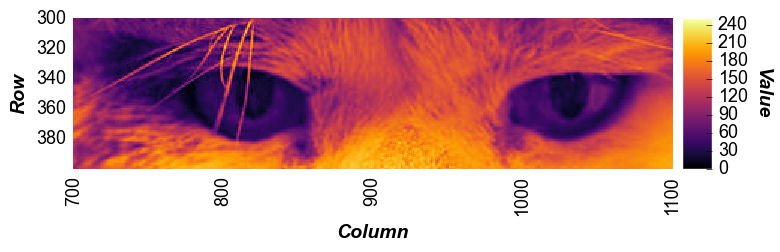

In [14]:
fcp.heatmap(img, cmap='inferno', cbar=True, ax_size=[600, 600], xmin=700, xmax=1100, ymin=300, ymax=400,)

<i> private eyes are watching you... </i>